In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pprint import pprint

import pandas as pd
import numpy as np
import seaborn as sns

# Import the file made on WeatherPy
file = 'unemployment.csv'
employment = pd.DataFrame(pd.read_csv(file))
employment.head()

,Unnamed: 0,Date,Mining,Construction,Durable_goods,Non_durable_goods,Retail,Transportation,Information,Financial_activities,Professional_and_business_activities,Education_and_health,Leisure_and_hospitality
0,35,2018-01,686.0,6729.0,7798.0,4670.0,15718.6,5273.4,2772.0,8448.0,20328.0,23262.0,15437.0
1,34,2018-02,695.0,6840.0,7834.0,4687.0,15577.0,5260.4,2807.0,8476.0,20462.0,23620.0,15588.0
2,33,2018-03,704.0,6933.0,7870.0,4688.0,15610.8,5289.6,2814.0,8491.0,20566.0,23656.0,15818.0
3,32,2018-04,712.0,7129.0,7887.0,4693.0,15668.9,5301.5,2826.0,8502.0,20815.0,23698.0,16118.0
4,31,2018-05,722.0,7336.0,7915.0,4721.0,15772.6,5356.2,2832.0,8552.0,20914.0,23630.0,16524.0


In [2]:
employment_data = employment.drop(columns=['Unnamed: 0', 'Date'])
employment_pct_change = employment_data.pct_change()
employment_pct_change = employment_pct_change.iloc[1:]
employment_pct_change.head()

,Mining,Construction,Durable_goods,Non_durable_goods,Retail,Transportation,Information,Financial_activities,Professional_and_business_activities,Education_and_health,Leisure_and_hospitality
1,0.013120,0.016496,0.004617,0.003640,-0.009008,-0.002465,0.012626,0.003314,0.006592,0.015390,0.009782
2,0.012950,0.013596,0.004595,0.000213,0.002170,0.005551,0.002494,0.001770,0.005083,0.001524,0.014755
3,0.011364,0.028271,0.002160,0.001067,0.003722,0.002250,0.004264,0.001295,0.012107,0.001775,0.018966
4,0.014045,0.029036,0.003550,0.005966,0.006618,0.010318,0.002123,0.005881,0.004756,-0.002869,0.025189
5,0.019391,0.021947,0.010992,0.010803,0.002225,0.006684,0.008121,0.010992,0.008559,-0.009056,0.029351


In [3]:

employment_pct_change.corr()


,Mining,Construction,Durable_goods,Non_durable_goods,Retail,Transportation,Information,Financial_activities,Professional_and_business_activities,Education_and_health,Leisure_and_hospitality
Mining,1.000000,0.623432,0.718690,0.730114,0.609790,0.620972,0.826330,0.786914,0.805043,0.702623,0.624124
Construction,0.623432,1.000000,0.779868,0.866405,0.745758,0.508016,0.614759,0.790748,0.816656,0.692703,0.877052
Durable_goods,0.718690,0.779868,1.000000,0.965873,0.909933,0.765586,0.837377,0.853027,0.903530,0.875815,0.953378
Non_durable_goods,0.730114,0.866405,0.965873,1.000000,0.909797,0.745667,0.832222,0.907605,0.929350,0.865827,0.962016
Retail,0.609790,0.745758,0.909933,0.909797,1.000000,0.860145,0.793921,0.832715,0.903464,0.815986,0.879631
Transportation,0.620972,0.508016,0.765586,0.745667,0.860145,1.000000,0.762002,0.671317,0.803579,0.773054,0.643534
Information,0.826330,0.614759,0.837377,0.832222,0.793921,0.762002,1.000000,0.857997,0.908884,0.864019,0.731564
Financial_activities,0.786914,0.790748,0.853027,0.907605,0.832715,0.671317,0.857997,1.000000,0.897225,0.729952,0.836564
Professional_and_business_activities,0.805043,0.816656,0.903530,0.929350,0.903464,0.803579,0.908884,0.897225,1.000000,0.916518,0.869037
Education_and_health,0.702623,0.692703,0.875815,0.865827,0.815986,0.773054,0.864019,0.729952,0.916518,1.000000,0.827081


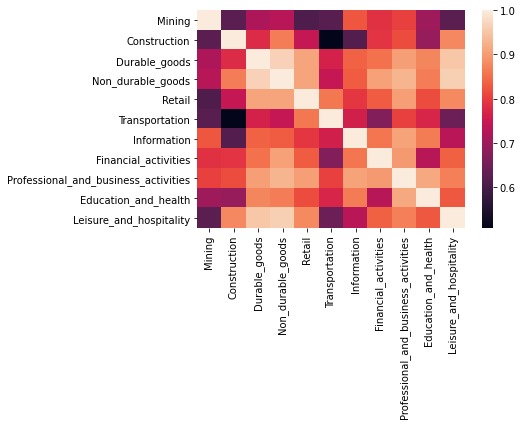

In [4]:
sns.heatmap(employment_pct_change.corr())

Correlation for Industries on NO COVID Months


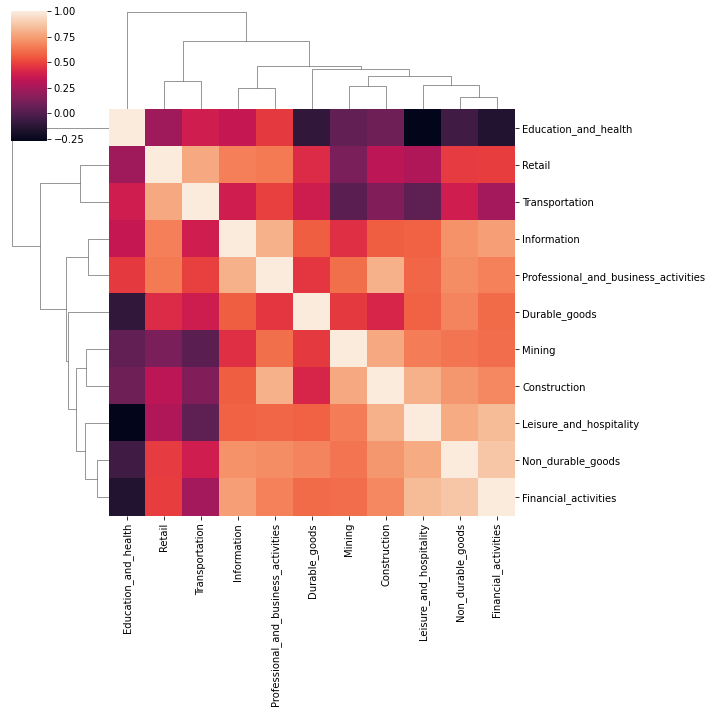

In [8]:
employment_nocovid = employment[employment['Unnamed: 0'] > 10] 
employment_nocovid = employment_nocovid.drop(columns=['Unnamed: 0', 'Date'])
employment_nocovid = employment_nocovid.pct_change()
employment_nocovid.corr()
g = sns.clustermap(employment_nocovid.corr())
print("Correlation for Industries on NO COVID Months")

Correlation for Industries on COVID Months


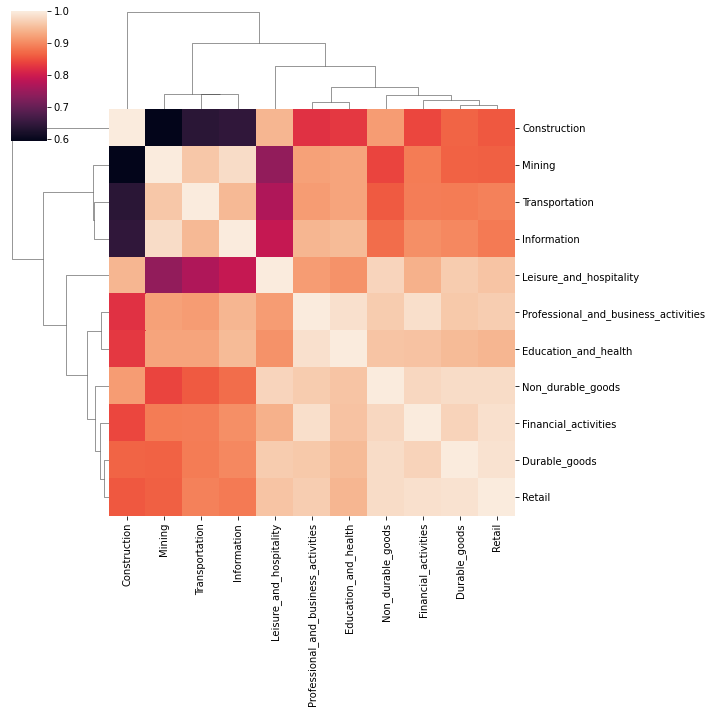

In [9]:
employment_covid = employment[employment['Unnamed: 0'] <= 10] 
employment_covid = employment_covid.drop(columns=['Unnamed: 0', 'Date'])
employment_covid = employment_covid.pct_change()
employment_covid.corr()
g = sns.clustermap(employment_covid.corr())
print("Correlation for Industries on COVID Months")